In [3]:
import matplotlib.pyplot as plt
from numpy import *
from pandas import DataFrame as DF
import csv

In [4]:
# "keep handy for copy/paste" - automatetheboring stuff
def process_csv(filename):
    exampleFile = open(filename, encoding='utf-8')
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [5]:
df = DF(process_csv('960_low_pass_data.csv')[1:])

In [6]:
trace1_df = df[[0,1]].astype(float)
xpts1, ypts1 = trace1_df.values.transpose()
l = len(ypts1)
endpts = ypts1[-2:] # the last two points are in different units :/
ypts1 = 20*log10(ypts1[:-2]/500)
ypts1 = concatenate((ypts1,endpts))

In [7]:
ypts1 = delete(ypts1, len(ypts1)-3)
xpts1 = delete(xpts1, len(xpts1)-3)

In [18]:
# 1mH inductor low-pass response for Z_l = 50 Ohms
# zl = 50
L = 10**(-3) # [H]
G = lambda f,zl: zl/sqrt(zl**2 + (2*pi*f)**2*L**2)

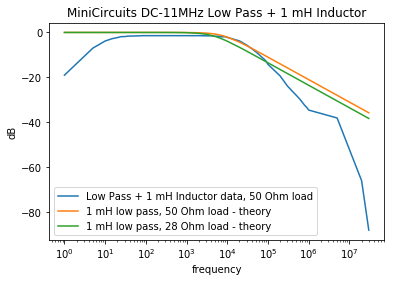

In [23]:
# something inconsistent about this comparison: low pass theory depends on the load impedance. low pass data doesn't-- 
# 20*log10(V/Vo) get's rid of impedance. 

# TODO: try mult-pole filter for better role off


fig,ax = plt.subplots()
ax.set_xscale('log')
ax.plot(xpts1,ypts1,label=f'Low Pass + 1 mH Inductor data, 50 Ohm load')
for zl in [50,28]:
    G = lambda f: zl/sqrt(zl**2 + (2*pi*f)**2*L**2)
    ax.plot(xpts1,10*log10(G(xpts1)),label=f'{int(L*1000)} mH low pass, {zl} Ohm load - theory')
ax.set_title(f'MiniCircuits DC-11MHz Low Pass + {int(L*1000)} mH Inductor')
ax.set_xlabel('frequency')
ax.set_ylabel('dB')
ax.legend(loc='lower left')
plt.show()